In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def load_safari(folder):

    mypath = os.path.join("./data", folder)
    txt_name_list = []
    for (dirpath, dirnames, filenames) in os.walk(mypath):
        for f in filenames:
            if f != '.DS_Store':
                txt_name_list.append(f)
                break

    slice_train = int(80000/len(txt_name_list))  ###Setting value to be 80000 for the final dataset
    i = 0
    seed = np.random.randint(1, 10e6)

    for txt_name in txt_name_list:
        txt_path = os.path.join(mypath,txt_name)
        x = np.load(txt_path)
        x = (x.astype('float32') - 127.5) / 127.5
        # x = x.astype('float32') / 255.0
        
        x = x.reshape(x.shape[0], 28, 28, 1)
        
        y = [i] * len(x)  
        np.random.seed(seed)
        np.random.shuffle(x)
        np.random.seed(seed)
        np.random.shuffle(y)
        x = x[:slice_train]
        y = y[:slice_train]
        if i != 0: 
            xtotal = np.concatenate((x,xtotal), axis=0)
            ytotal = np.concatenate((y,ytotal), axis=0)
        else:
            xtotal = x
            ytotal = y
        i += 1
        
    return xtotal, ytotal

In [3]:
(x_train, y_train) = load_safari('camel')

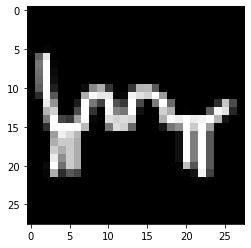

In [4]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

In [6]:
from GAN import GAN 

In [7]:
gan = GAN()

In [8]:
gan.discriminator_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv2D_layer1 (Conv2D)       (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_9 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
Conv2D_layer2 (Conv2D)       (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_10 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0   

In [9]:
gan.generator_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_4 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_13 (Activation)   (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
layer2_upsample (Conv2D)     (None, 14, 14, 128)       2049

In [10]:
BATCH_SIZE = 64
EPOCHS = 400
PRINT_EVERY_N_BATCHES = 50

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = 'history/GAN/Camel_dataset'
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

0 [D loss: (0.709)(R 0.693, F 0.726)] [D acc: (0.289)(0.578, 0.000)] [G loss: 0.689] [G acc: 1.000]
1 [D loss: (0.686)(R 0.664, F 0.707)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.478] [G acc: 1.000]
2 [D loss: (10.477)(R 0.293, F 20.661)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.305] [G acc: 1.000]
3 [D loss: (0.538)(R 0.330, F 0.746)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.244] [G acc: 1.000]
4 [D loss: (0.595)(R 0.288, F 0.902)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.221] [G acc: 1.000]
5 [D loss: (0.654)(R 0.285, F 1.024)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.220] [G acc: 1.000]
6 [D loss: (0.692)(R 0.294, F 1.090)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.248] [G acc: 1.000]
7 [D loss: (0.697)(R 0.318, F 1.077)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.280] [G acc: 1.000]
8 [D loss: (0.708)(R 0.336, F 1.080)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.328] [G acc: 1.000]
9 [D loss: (0.703)(R 0.366, F 1.039)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.361] [G acc: 1.000

82 [D loss: (0.719)(R 0.327, F 1.111)] [D acc: (0.484)(0.969, 0.000)] [G loss: 0.676] [G acc: 0.562]
83 [D loss: (0.603)(R 0.288, F 0.918)] [D acc: (0.531)(0.969, 0.094)] [G loss: 0.754] [G acc: 0.141]
84 [D loss: (0.576)(R 0.415, F 0.738)] [D acc: (0.656)(0.953, 0.359)] [G loss: 0.718] [G acc: 0.219]
85 [D loss: (0.580)(R 0.294, F 0.866)] [D acc: (0.578)(0.953, 0.203)] [G loss: 0.780] [G acc: 0.031]
86 [D loss: (0.555)(R 0.373, F 0.737)] [D acc: (0.664)(0.938, 0.391)] [G loss: 0.782] [G acc: 0.094]
87 [D loss: (0.570)(R 0.287, F 0.853)] [D acc: (0.562)(0.953, 0.172)] [G loss: 0.847] [G acc: 0.016]
88 [D loss: (0.522)(R 0.400, F 0.643)] [D acc: (0.875)(0.906, 0.844)] [G loss: 0.832] [G acc: 0.078]
89 [D loss: (0.495)(R 0.214, F 0.776)] [D acc: (0.664)(0.969, 0.359)] [G loss: 0.964] [G acc: 0.000]
90 [D loss: (0.526)(R 0.423, F 0.628)] [D acc: (0.820)(0.781, 0.859)] [G loss: 0.858] [G acc: 0.094]
91 [D loss: (0.482)(R 0.128, F 0.836)] [D acc: (0.680)(1.000, 0.359)] [G loss: 1.140] [G ac

# GAN

In [ ]:
class GAN():
    def __init__(self,
                input_dim, 
                discriminator_conv_filters, 
                discriminator_conv_kernel_size, 
                discriminator_conv_strides, 
                discriminator_batch_norm_momentum, 
                discriminator_activation, 
                discriminator_dropout_rate, 
                discriminator_learning_rate, 
                generator_initial_dense_layer_size, 
                generator_upsample, 
                generator_conv_filters, 
                generator_conv_kernel_size, 
                generator_conv_strides, 
                generator_batch_norm_momentum, 
                generator_activation, 
                generator_dropout_rate, 
                generator_learning_rate,
                optimiser,
                z_dim,
                 
                ):
        self.name = 'gan'
        self.input_dim = input_dim 
        self.discriminator_conv_filters = discriminator_conv_filters
        self.discriminator_conv_kernel_size = disciriminator_conv_kernel_size
        self.discriminator_conv_strides = discriminator_conv_strides 
        self.discriminator_batch_norm_monentum = discriminator_batch_norm_monentum
        self.discriminator_activation = discriminator_activation 
        self.discriminator_dropout_rate = discriminator_dropout_rate
        self.discriminator_learning_rate = discriminator_learning_rate
        
        
        self.generator_initial_dense_layer_size = generator_initial_dense_layer_size
        self.generator_upsample = generator_upsample 
        self.generator_conv_filters = generator_conv_filters 
        self.generator_conv_kernel_size = generator_conv_kernel_size 
        self.generator_conv_strides = generator_conv_strides 
        self.generator_batch_norm_momentum = generator_batch_norm_momentum
        self.generator_activation = generator_activation 
        self.generator_dropout_rate = generator_dropout_rate 
        self.generator_learning_rate = generator_learning_rate 
        
        self.optimiser = optimiser 
        self.z_dim = z_dim 
        
        self.n_layers_discriminator = len(discriminator_conv_filters)
        self.n_layers_generator = len(generator_conv_filters)
        
        self.weight_init = RandomNormal(mean = 0., stddev = 0.02)
        
        self.d_losses = []
        self.g_losses = []
        self.epoch = 0 
        
        self._build_discirminator()
        self._build_generator()
        
        self._build_adversarial()
        
        
        

    def get_activation(self, activation):
        if activation == 'leaky_relu'
            layer = LeakyReLU(alpha = 0.2)
        else: 
            layer = Activation(activation)
        return layer 
    
    def _build_discriminator(self):
        ## Discriminator 
        
        discriminator_input = Input(shape = self.input_dim, name= 'discriminator_input')
        
        x = discriminator_input 
        
        for i in range(self.n_layers_discriminator):
            x = Conv2D(
                    filters = self.discriminator_conv_filters[i], 
                kernel_size = self.discriminator_conv_kernel_size[i],
                strides = self.discriminator_conv_strides[i],
                padding = 'same',
                name = 'discriminator_conv_'+str(i),
                kernel_initializer = self.weight_init
            )(x)
            
            
            if self.discriminator_batch_norm_momentum and i > 0: 
                x = BatchNormalization(momentum = self.discriminator_batch_norm_momentum)(x)
            
            
        
            x = self.get_activation(self.discriminator_activation)(x)
            if self.discriminator_dropout_rate: 
                x = Dropout(rate = self.discriminator_dropout_rate)(x)
                
        x =  Flatten()(x)
        
        discriminator_output = Dense(1, activation = 'sigmoid', kernel_initializer = self.weight_init)(x)
        
        self.discriminator = Model(discriminator_input, discriminator_output)
        
        
        
    def _build_generator(self):
        generator_input = Input(shape = (self.z_dim,), name = 'generator_input')
        x = generator_input
        x = Dense(np.prod(self.generator_initial_dense_layer_size), kernel_initializer = self.weight_init)(x)
        
        if self.generator_batch_norm_momentum: 
            x = BatchNormalization(momentum = self.generator_batch_norm_momentum)(x)
        x = self.get_activation(self.generator_activation)(x)
        
        x = Reshape(self.generator_initial_dense_layer_size)(x)
        
        if self.generator_dropout_rate: 
            x = Dropout(rate = self.generator_dropout_rate)(x)
            
        for i in range(self.n_layers_generator):
            if self.gnerator_upsample[i] == 2: 
                x = UpSampling2D()(x)
                x = Conv2D(
                    filters = self.generator_conv_filters[i],
                    kernel_size = self.generator_conv_kernel_size[i],
                    padding = 'same',
                    name = 'generator_conv_' + str(i)
                    kernel_initializer = self.weight_init
                )(x)
                
            else: 
                x = Conv2DTranspose(
                    filters = self.generator_conv_filters[i],
                    kernel_size = self.generator_conv_kernel_size[i],
                    padding = 'same',
                    strides = self.generator_conv_strides[i],
                    name = 'generator_conv' + str(i),
                    kernel_initializer =self.weight_init
                    
                )(x)
                
                
            if i < self.n_layers_generator -1: 
                if self.generator_batch_norm_momentum: 
                    x = BatchNormalization(momentum = self.generator_batch_norm_momentum)(x)
                    
                x = self.get_activation(self.generator_activation)(x)
                
            else: 
                x = Activation('tanh')(x)
                
                
        generator_output = x 
        
        self.generator = Model(generator_input, generator_output)
        
        
    def get_opti(self, lr):
        if self.optimizer == 'adam':
            opti = Adam(lr = lr, beta_1 = 0.5)
            
        elif self.optimizer = 'rmsprop':
            opti = RMSprop(lr = lr)
            
        else: 
            opti = Adam(lr= lr)
            
    def set_trainable(self, m, val):
        m.trainable = val 
        for l in m.layers: 
            l.trainable = val 
            
            
    def _build_adversarial(self):
        
        ## Compile discriminator 
        
        self.discriminator.compile(
            optimizer = self.get_opti(self.discriminator_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy']
        )
        
        
        
        self.set_trainable(self.discriminator, False)
        
        model_input = Input(shape = (self.z_dim,), name = 'model_input')
        model_output = self.discriminator(self.generator(model_input))
        
        self.model = Model(model_input, model_output)
        self.model.compile(optimizer = self.get_opti(self.generator_learning_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
        
        self.set_trainable(self.discriminator, True)
        
        
    def train_discriminator(self, x_train, batch_size, using_generator):
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        if using_generator: 
            true_imgs = next(x_train)[0]
            if true_ims.shape[0] != batch_size: 
                true_imgs = next(x_train)[0]
                
        else: 
            idx = np.random.randint(0, x_train.shape[0], batch_size)
            true_imgs = x_train[idx]
            
        noise = np.random.normal(0,1, (batch_size, self.z_dim))
        
        gen_imgs = self.generator.predict(noise)
        
        d_loss_real, d_acc_real = self.discriminator.train_on_batch(true_imgs, valid)
        d_loss_fake, d_acc_fake = self.discriminator.train_on_batch(gen_imgs, fake)
        
        d_loss = 0.5*(d_loss_real + d_loss_fake)
        d_acc = 0.5 * (d_acc_real + d_acc_fake)
        
        return [d_loss, d_loss_real, d_loss_fake, d_acc, d_acc_real, d_acc_fake]
    
    
    def train_generator(self, batch_size):
        valid = np.ones((batch_size, 1))
        noise = np.random.normal(0,1, (batch_size, self.z_dim))
        
        return self.model.train_on_batch(noise, valid)
    
    def train(self, x_train, batch_size, epochs, run_folder, print_every_n_batches = 50, using_generator = False):
        
        
        for epoch in range(self.epoch, self.epoch+ epochs):
            d = self.train_discriminator(x_train, batch_size, using_generator)
            g = self.train_generator(batch_size)
            
            
            print("%d [D loss: (%.3f)(R %.3f, F %.3f)] [D acc: (%.3f)(%.3f, %.3f)] [G loss: %.3f] [G acc: %.3f]" % (epoch, d[0], d[1], d[2], d[3], d[4], d[5], g[0], g[1]))
            
            self.d_losses.append(d)
            self.g_losses.append(g)
            
            if epoch % print_every_n_batches ==0:
                self.sample_images(run_folder)
                self.model.save_weights(os.path.join(run_folder, 'weights/weights-%d.h5' % (epoch)))
                self.model.save_weights(os.path.join(run_folder, 'weights/weights.h5'))
                
                self.save_model(run_folder)
                
            self.epoch +=1 
            
            
    def sample_images(self, run_folder):
        r, c = 5,5 
        noise = np.random.normal(0, 1, (r*c, self.z_dim))
        gen_imgs = self.generator.predict(noise)
        
        gen_imgs = 0.5 * (gen_imgs +1)
        gen_imgs = np.clip(gen_imgs, 0 ,1)
        
        fig, axs = plt.subplots(r,c, figsize = (15, 15))
        cnt  = 0 
        
        for i in range(r):
            forr j in range(c):
                axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :, :,:]), cmap = 'gray')
                
                axs[i, j].axis('off')
                cnt +=1 
                
        for savefig(os.path.join(run_folder, 'images/sample_%d.png'%self.epoch))
        
        plt.close()
        
    
    def plot_model(self, run_folder):
        plot_model(self.model, to_file=os.path.join(run_folder ,'viz/model.png'), show_shapes = True, show_layer_names = True)
        plot_model(self.discriminator, to_file=os.path.join(run_folder ,'viz/discriminator.png'), show_shapes = True, show_layer_names = True)
        plot_model(self.generator, to_file=os.path.join(run_folder ,'viz/generator.png'), show_shapes = True, show_layer_names = True)

    def save(self, folder):

        with open(os.path.join(folder, 'params.pkl'), 'wb') as f:
            pkl.dump([
                self.input_dim
                , self.discriminator_conv_filters
                , self.discriminator_conv_kernel_size
                , self.discriminator_conv_strides
                , self.discriminator_batch_norm_momentum
                , self.discriminator_activation
                , self.discriminator_dropout_rate
                , self.discriminator_learning_rate
                , self.generator_initial_dense_layer_size
                , self.generator_upsample
                , self.generator_conv_filters
                , self.generator_conv_kernel_size
                , self.generator_conv_strides
                , self.generator_batch_norm_momentum
                , self.generator_activation
                , self.generator_dropout_rate
                , self.generator_learning_rate
                , self.optimiser
                , self.z_dim
                ], f)

        self.plot_model(folder)
        
    def save_model(self, run_folder):
        self.model.save(os.path.join(run_folder, 'model.h5'))
        self.discriminator.save(os.path.join(run_folder, 'discriminator.h5'))
        self.generator.save(os.path.join(run_folder, 'generator.h5'))
        pkl.dump(self, open( os.path.join(run_folder, "obj.pkl"), "wb" ))

    def load_weights(self, filepath):
        self.model.load_weights(filepath)
            
            
        
        
        
        